Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.shape)
df.head()

df.info()

df.describe()

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [3]:
class_names = {0:'Not Diabetes', 1:'Diabetes'}
print(df.diabetes.value_counts().rename(index = class_names))

diabetes
Not Diabetes    91500
Diabetes         8500
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
feature_names = df.iloc[:, 1:8].columns
target = df.iloc[:1, 8: ].columns
print(feature_names)
print(target)


data_features = df[feature_names]   #X
data_target = df[target]            #Y

X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

#X train and Y train needs to be same length. we can use shape instead of length

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
Index(['diabetes'], dtype='object')
Length of X_train is: 70000
Length of X_test is: 30000
Length of y_train is: 70000
Length of y_test is: 30000


🌟 Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()

In [5]:
#In logistic regression we need to use StandardScaler because if not it would give more importance to columns which amounts were bigger
#We use Logistic regression because is a Yes diabetes or no diabetes
#StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()
#to convert the string values into numerical labels

# Iterate over each column in X_train
for column in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder to the column and transform it
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column]) # Use same encoding on test data


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🌟 Exercise 3 : Model Training
We will use, the logistic regression model, Train it.

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# we use .ravel() to transform the y_train data into a 1D array because LogisticRegression() expects the target variable (in this case, y_train) to be a 1D array rather than a column vector or a 2D array.
model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

In [8]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.63
F1 Score for Logistic Regression Model 1 : 0.73


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred,target_names=class_names))

              precision    recall  f1-score   support

   not_fraud       0.97      0.99      0.98     27422
       fraud       0.88      0.63      0.73      2578

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



🌟 Exercise 4 : Evaluation Metrics
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.


In [10]:
#plot accuracy
from sklearn.metrics import accuracy_score
# accuracy_score = round(accuracy_score(y_test, pred), 2)
calculated_accuracy = round(accuracy_score(y_test, pred), 2)
print("Accuracy Score for Logistic Regression Model 1 : {accuracy_score}".format(accuracy_score = calculated_accuracy))

Accuracy Score for Logistic Regression Model 1 : 0.96


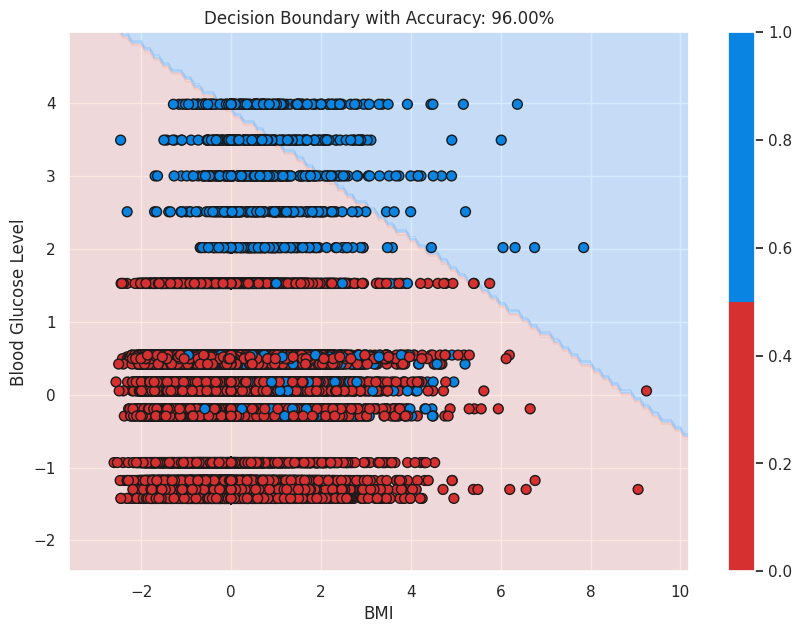

In [19]:
from matplotlib.colors import ListedColormap

#select 2 features
X = X_test[:, [4, 6]]  # bmi and blood_glucose_level
y = y_test.values.ravel()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# **Change 1: Use all features from X_test for prediction**
# Instead of using only 2 features for prediction, use all 7 features
# by creating a new array with the selected features repeated for each grid point.
num_samples = xx.ravel().shape[0]
X_grid = np.zeros((num_samples, X_test.shape[1]))  # Initialize with zeros
X_grid[:, 4] = xx.ravel()  # Assign bmi values to the 4th column
X_grid[:, 6] = yy.ravel()  # Assign blood_glucose_level values to the 6th column

# **Change 2: Predict using the new array with all features**
Z = model.predict(X_grid)  # Predict using the grid data with all features
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#fab1a0', '#74b9ff']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#d63031', '#0984e3']), edgecolors='k', s=50)

plt.title(f'Decision Boundary with Accuracy: {calculated_accuracy*100:.2f}%')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.colorbar()
plt.show()

red is people without diabetes. Blue is with diabetes. line that separate is the decision boundary. accuracy is 96%

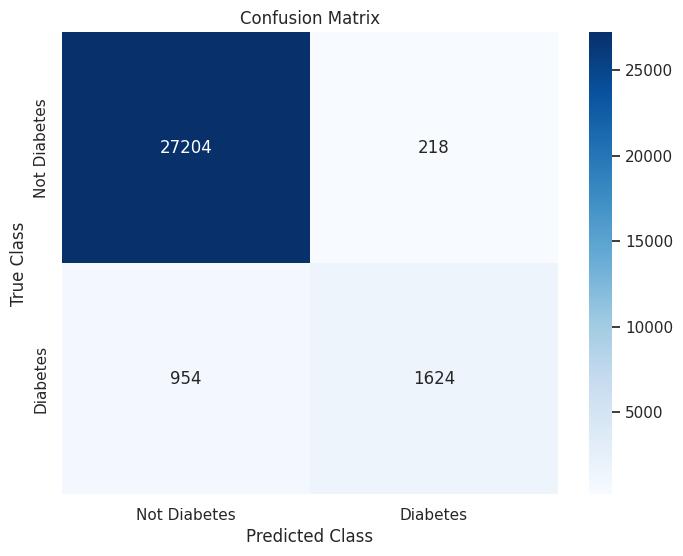

Comment: The confusion matrix shows that most of the positive cases (fraud/diabetes) are correctly predicted, but there is still a significant number of false negatives, which can be problematic when predicting medical conditions.


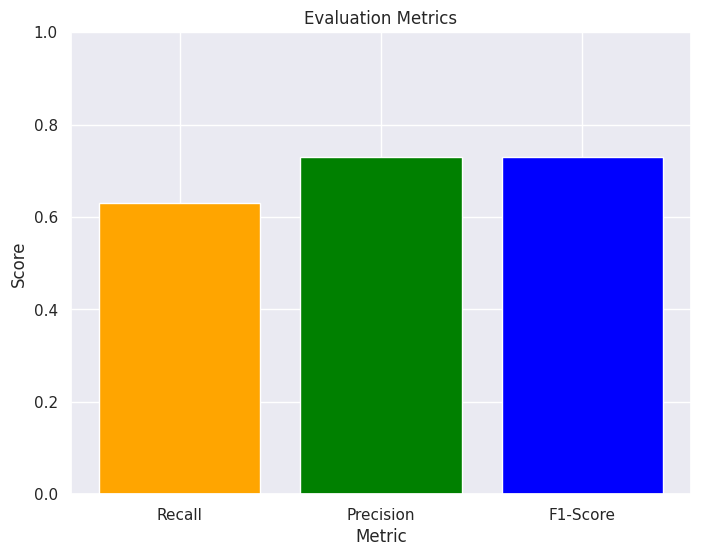

Recall: 0.63
F1 Score: 0.73
Comment: The recall score (0.63) indicates that the model is only catching 63% of the positive cases, which is not ideal for medical predictions where false negatives can have serious consequences.


In [26]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
                        xticklabels=['Not Diabetes', 'Diabetes'],
                        yticklabels=['Not Diabetes', 'Diabetes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print("Comment: The confusion matrix shows that most of the positive cases (fraud/diabetes) are correctly predicted, but there is still a significant number of false negatives, which can be problematic when predicting medical conditions.")

# Plotting Recall, Precision, and F1-Score
metrics = ['Recall', 'Precision', 'F1-Score']
values = [recall_score, f1_score, round(f1_score, 2)]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['orange', 'green', 'blue'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

print(f"Recall: {recall_score}")
print(f"F1 Score: {f1_score}")
print("Comment: The recall score (0.63) indicates that the model is only catching 63% of the positive cases, which is not ideal for medical predictions where false negatives can have serious consequences.")


The confusion matrix shows that the model performs well in identifying non-diabetic patients (True Negatives: 27204), with a small number of false alarms (False Positives: 218).
However, the model struggles to correctly identify all diabetic patients. It captures 63% of positive cases (Recall Score: 0.63), meaning that 954 diabetic patients were misclassified as non-diabetic (False Negatives), which could have serious consequences in a medical context.




🌟 Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.

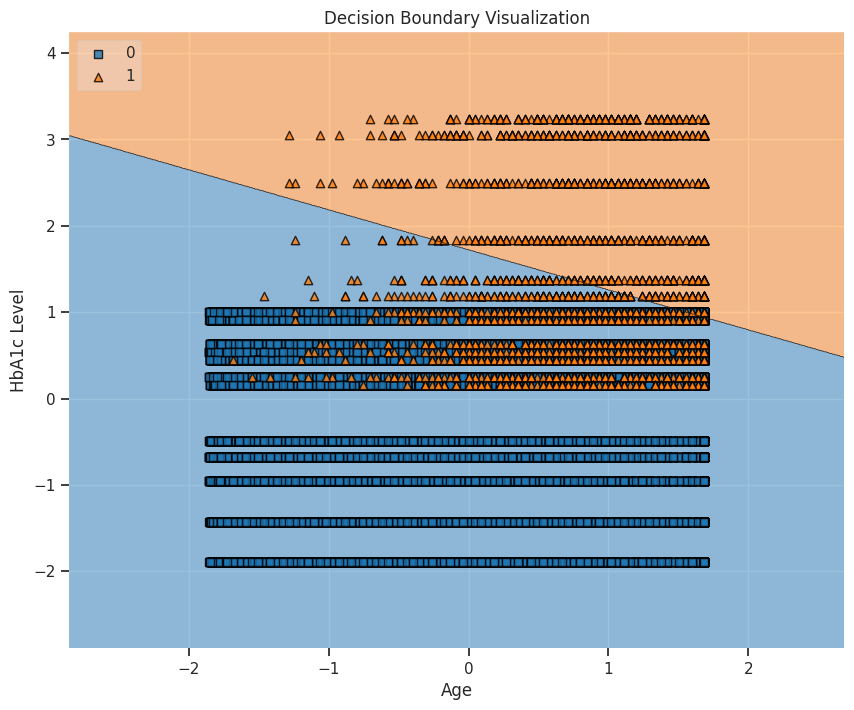

Comment: The decision boundary visualization shows how the logistic regression model separates the two classes based on the two selected features. However, logistic regression creates linear decision boundaries, which may not be sufficient to capture complex patterns in the data.


In [13]:
from mlxtend.plotting import plot_decision_regions

# We can only visualize decision boundaries in 2D, so let's take two features to visualize
X_vis = X_test[:, [0, 5]]  # Taking 'age' and 'HbA1c_level'
y_vis = y_test.values.ravel()

model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_vis, y_vis, clf=model_vis, legend=2)
plt.title('Decision Boundary Visualization')
plt.xlabel('Age')
plt.ylabel('HbA1c Level')
plt.show()

print("Comment: The decision boundary visualization shows how the logistic regression model separates the two classes based on the two selected features. However, logistic regression creates linear decision boundaries, which may not be sufficient to capture complex patterns in the data.")


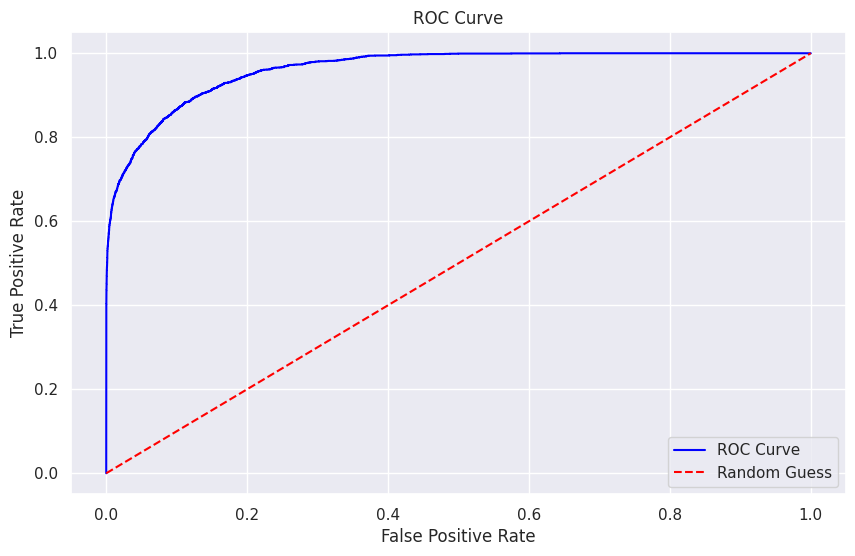

AUC Score: 0.96


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class (Diabetes = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')  # Diagonal line for random guessing
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Calculate AUC (Area Under Curve)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", round(auc, 2))


With this curve we can see the accuracy is very high. But accuracy in Lineal regression is not really important because if for example 90% of pacients dont have diabetes and accuracy is 90% then it means it failed in detect all the ones that had diabetes. In this case of Recall score 63% it means is missing a lot of diabetic patients which would be dangerous in a medical context.